In [143]:
library(dplyr)
library(ggplot2)
library(urbnmapr)
library(maps)
library(plotly)

Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [3]:
data <- read.csv("countypres.csv")

In [4]:
head(data)

year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
2000,ALABAMA,AL,BALDWIN,1003,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL
2000,ALABAMA,AL,BALDWIN,1003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,40872,56480,20220315,TOTAL


In [21]:
data_clean <- data %>% select(c('year','state','state_po','county_name','county_fips','office','candidate','party','candidatevotes','totalvotes'))
data_clean <- aggregate(candidatevotes ~.,data_clean, FUN = sum)
head(data_clean)

year,state,state_po,county_name,county_fips,office,candidate,party,totalvotes,candidatevotes
2000,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,AL GORE,DEMOCRAT,0,0
2000,MISSOURI,MO,KANSAS CITY,36000,US PRESIDENT,AL GORE,DEMOCRAT,0,0
2008,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,BARACK OBAMA,DEMOCRAT,0,0
2012,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,BARACK OBAMA,DEMOCRAT,0,0
2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0
2004,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,JOHN KERRY,DEMOCRAT,0,0


In [52]:
winners <- data_clean %>% group_by(year, county_name, county_fips, office) %>% filter(candidatevotes == max(candidatevotes, na.rm = TRUE))
winners <- winners %>% filter(party %in% c('DEMOCRAT','REPUBLICAN'))
winners$color <- ifelse(winners$party == 'DEMOCRAT','CornflowerBlue','Brown1')
tail(winners)

year,state,state_po,county_name,county_fips,office,candidate,party,totalvotes,candidatevotes,color
2000,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,AL GORE,DEMOCRAT,0,0,CornflowerBlue
2000,MISSOURI,MO,KANSAS CITY,36000,US PRESIDENT,AL GORE,DEMOCRAT,0,0,CornflowerBlue
2008,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,BARACK OBAMA,DEMOCRAT,0,0,CornflowerBlue
2012,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,BARACK OBAMA,DEMOCRAT,0,0,CornflowerBlue
2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,CornflowerBlue
2004,ALASKA,AK,DISTRICT 99,2099,US PRESIDENT,JOHN KERRY,DEMOCRAT,0,0,CornflowerBlue


In [123]:
winners %>% filter(state == 'NORTH CAROLINA') %>% head()
winners <- winners %>% filter(totalvotes > 0)
#str(winners)

year,state,state_po,county_name,county_fips,office,candidate,party,totalvotes,candidatevotes,color
2000,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,AL GORE,DEMOCRAT,1566,849,CornflowerBlue
2004,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,1590,855,Brown1
2016,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,DONALD TRUMP,REPUBLICAN,1739,975,Brown1
2012,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,MITT ROMNEY,REPUBLICAN,1783,930,Brown1
2020,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,1817,1044,Brown1
2008,NORTH CAROLINA,NC,TYRRELL,37177,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,1910,960,Brown1


In [94]:
#winners$county_fips <- as.character(winners$county_fips)
i = 1
while(i <= length(winners$county_fips)){
    if(nchar(winners$county_fips[i]) < 5){
        winners$county_fips[i] <- paste0('0',winners$county_fips[i])
    }
    i = i + 1
}

In [129]:
comb <- as.data.frame(left_join(winners, urbnmapr::counties, by = c("county_fips" = "county_fips")))
head(comb)

year,state,state_po,county_name.x,county_fips,office,candidate,party,totalvotes,candidatevotes,...,lat,order,hole,piece,group,state_abbv,state_fips,county_name.y,fips_class,state_name
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,32.00012,175121,FALSE,1,48301.1,TX,48,Loving County,H1,Texas
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,32.00055,175122,FALSE,1,48301.1,TX,48,Loving County,H1,Texas
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,32.00020,175123,FALSE,1,48301.1,TX,48,Loving County,H1,Texas
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,32.00021,175124,FALSE,1,48301.1,TX,48,Loving County,H1,Texas
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,32.00037,175125,FALSE,1,48301.1,TX,48,Loving County,H1,Texas
2012,TEXAS,TX,LOVING,48301,US PRESIDENT,MITT ROMNEY,REPUBLICAN,64,54,...,31.65142,175126,FALSE,1,48301.1,TX,48,Loving County,H1,Texas


In [265]:
#comb_final <- comb %>% filter(year == 2008 & state %in% toupper(c('Maryland')))

raw <- function(cycle, states){
    if(nchar(states) == 0){
      clean <- comb %>% filter(year == cycle)
    }else{
      clean <- comb %>% filter(year == cycle & state %in% toupper(states))
    }
    clean
}



In [276]:
swing_chart <- function(year1, year2, states=''){
    comb1 <- raw(year1, states)
    comb2 <- raw(year2, states)
    perc2 <- data.frame(comb2$order, ifelse(comb2$party == 'DEMOCRAT', 
        -1*comb2$candidatevotes/comb2$totalvotes,comb2$candidatevotes/comb2$totalvotes))
    colnames(perc2) <- c("order","perc2")
    comb3 <- left_join(comb1, perc2, by = "order")
    comb3$perc <- ifelse(comb3$party == 'DEMOCRAT', 
        -1*comb3$candidatevotes/comb3$totalvotes,comb3$candidatevotes/comb3$totalvotes)
    comb3$swing <- comb3$perc2 - comb3$perc
    comb3$color <- ifelse(comb3$swing >= 0, "brown1","cornflowerblue")
    fig <- ggplot() + 
    geom_polygon(data = comb3, mapping = aes(x = long, y = lat, group = group),
		fill = comb3$color, color = "black") +
    coord_map(projection = "albers", lat0 = 39, lat1 = 45) + theme_void() + ggtitle(paste0("U.S. Presidential Election Swing Chart, ",year1," to ", year2))

    fig
}

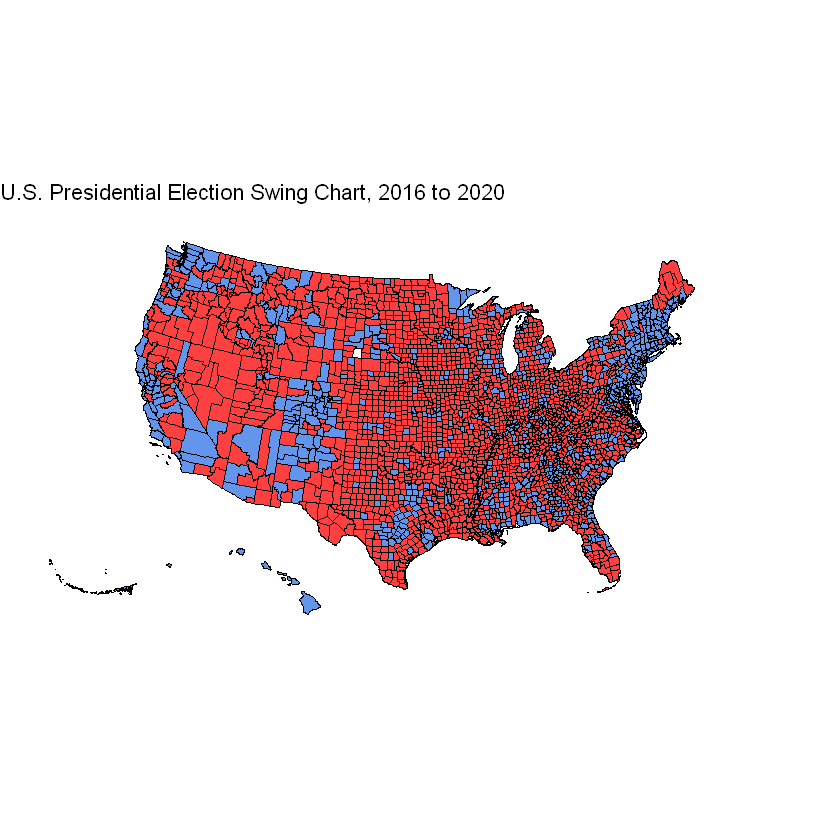

In [279]:
swing_chart(2016,2020)

In [264]:
head(raw(2008,'Maryland'))

year,state,state_po,county_name.x,county_fips,office,candidate,party,totalvotes,candidatevotes,...,lat,order,hole,piece,group,state_abbv,state_fips,county_name.y,fips_class,state_name
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.16189,90313,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.16827,90314,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17079,90315,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17624,90316,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17809,90317,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.18707,90318,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland


year,state,state_po,county_name.x,county_fips,office,candidate,party,totalvotes,candidatevotes,...,lat,order,hole,piece,group,state_abbv,state_fips,county_name.y,fips_class,state_name
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.16189,90313,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.16827,90314,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17079,90315,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17624,90316,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.17809,90317,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.18707,90318,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.20381,90319,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.20331,90320,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.19975,90321,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
2008,MARYLAND,MD,SOMERSET,24039,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,9924,5037,...,38.19829,90322,FALSE,1,24039.1,MD,24,Somerset County,H1,Maryland
